In [12]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Step 1: Download a dataset of asset returns, import from yfinance
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN"]  # Replace with your desired tickers
data = yf.download(tickers, period="1y")["Adj Close"].pct_change().dropna()

[*********************100%***********************]  4 of 4 completed


In [14]:
# Step 2: Calculate the expected returns and standard deviations of the assets
returns = data.mean()
std_devs = data.std()

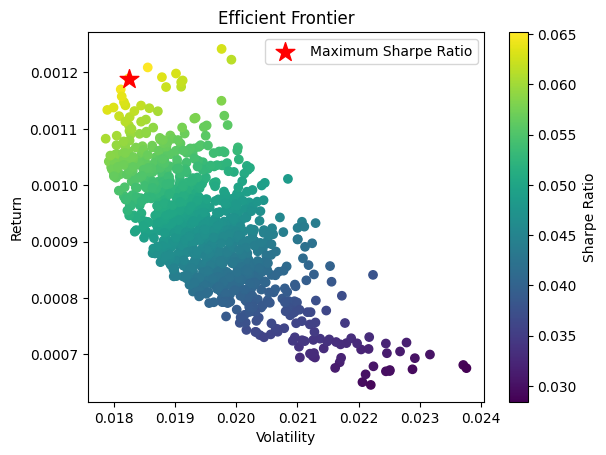

In [15]:
# Step 3: Plot the efficient frontier for the dataset
num_portfolios = 1000
results = np.zeros((3, num_portfolios))
weights = np.zeros((num_portfolios, len(tickers)))

for i in range(num_portfolios):
    w = np.random.random(len(tickers))
    w /= np.sum(w)
    weights[i, :] = w
    port_return = np.sum(w * returns)
    port_std = np.sqrt(np.dot(w.T, np.dot(data.cov(), w)))
    results[0, i] = port_return
    results[1, i] = port_std
    results[2, i] = port_return / port_std

max_sharpe_idx = np.argmax(results[2])
max_sharpe_ret = results[0, max_sharpe_idx]
max_sharpe_std = results[1, max_sharpe_idx]

plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.scatter(max_sharpe_std, max_sharpe_ret, marker='*', color='r', s=200, label='Maximum Sharpe Ratio')
plt.legend()
plt.show()

In [16]:
# Step 4: Calculate the EW and GMV portfolios
ew_weights = np.ones(len(tickers)) / len(tickers)
ew_return = np.sum(ew_weights * returns)
ew_std = np.sqrt(np.dot(ew_weights.T, np.dot(data.cov(), ew_weights)))

inv_cov_matrix = np.linalg.inv(data.cov())
gmv_weights = inv_cov_matrix.dot(np.ones(len(tickers))) / np.sum(inv_cov_matrix.dot(np.ones(len(tickers))))
gmv_return = np.sum(gmv_weights * returns)
gmv_std = np.sqrt(np.dot(gmv_weights.T, np.dot(data.cov(), gmv_weights)))

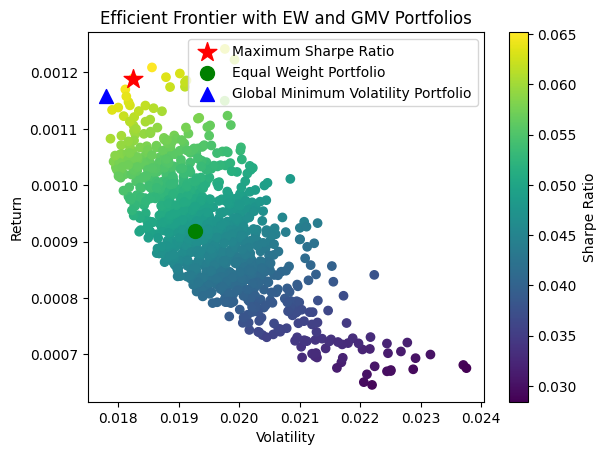

In [17]:
# Step 5: Plot the EW and GMV portfolios on the efficient frontier
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier with EW and GMV Portfolios')
plt.scatter(max_sharpe_std, max_sharpe_ret, marker='*', color='r', s=200, label='Maximum Sharpe Ratio')
plt.scatter(ew_std, ew_return, marker='o', color='g', s=100, label='Equal Weight Portfolio')
plt.scatter(gmv_std, gmv_return, marker='^', color='b', s=100, label='Global Minimum Volatility Portfolio')
plt.legend()
plt.show()

In [18]:
# Step 6: Compare the performance of the EW and GMV portfolios on the efficient frontier
print("Equal Weight Portfolio:")
print("Return:", ew_return)
print("Volatility:", ew_std)

print("\nGlobal Minimum Volatility Portfolio:")
print("Return:", gmv_return)
print("Volatility:", gmv_std)

Equal Weight Portfolio:
Return: 0.0009188382183513977
Volatility: 0.01926681106352405

Global Minimum Volatility Portfolio:
Return: 0.001158305327796736
Volatility: 0.017789908124995573
